In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(f"training data shape: {x_train.shape}")
print(f"testing data shape: {x_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
training data shape: (50000, 32, 32, 3)
testing data shape: (10000, 32, 32, 3)


In [ ]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3728 - loss: 1.7112 - val_accuracy: 0.5798 - val_loss: 1.1696
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 56ms/step - accuracy: 0.6012 - loss: 1.1297 - val_accuracy: 0.6015 - val_loss: 1.1163
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 47ms/step - accuracy: 0.6611 - loss: 0.9657 - val_accuracy: 0.6680 - val_loss: 0.9485
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7002 - loss: 0.8653 - val_accuracy: 0.6678 - val_loss: 0.9596
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7241 - loss: 0.7873 - val_accuracy: 0.6878 - val_loss: 0.9116
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7466 - loss: 0.7196 - val_accuracy: 0.6943 - val_loss: 0.9141
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 51ms/step - accuracy: 0.7693 - loss: 0.6618 - val_accuracy: 0.6996 - val_loss: 0.8734
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.7895 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 5s - 15ms/step - accuracy: 0.7221 - loss: 0.8639

Test accuracy: 0.722100019454956


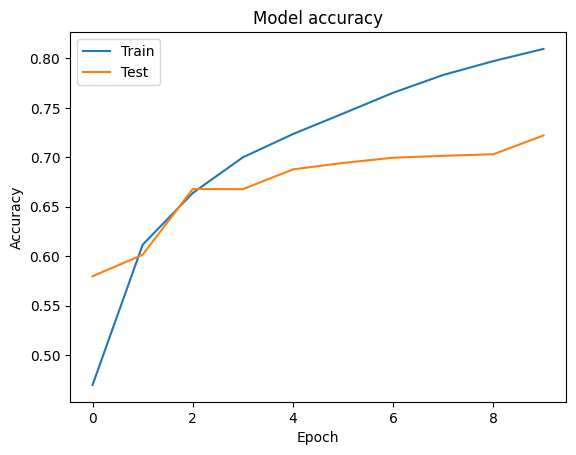

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

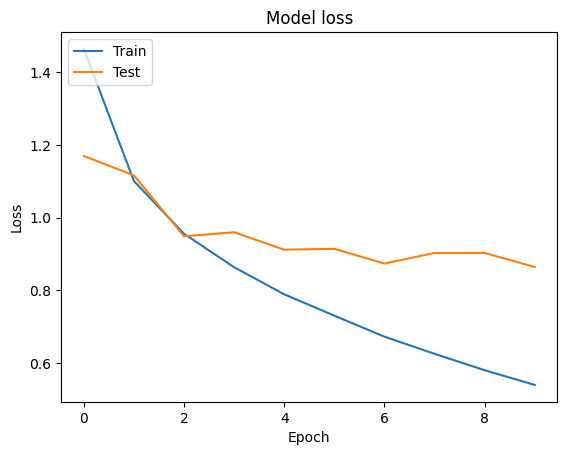

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('my_cnn_model.h5')
loaded_model = tf.keras.models.load_model('my_cnn_model.h5')